# Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import glob
import operator
import os
from os import listdir
import csv

import PIL
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Thu Jun 23 21:48:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Build model

In [6]:
batch_size = 64
epochs = 100

In [7]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

In [8]:
def plot_training(history_n):
    sn.set(font_scale=1)
    n_epochs = len(history_n.history['loss'])
    epochs_range = range(n_epochs)

    acc = history_n.history['accuracy']
    val_acc = history_n.history['val_accuracy']
    loss = history_n.history['loss']
    val_loss = history_n.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [9]:
def build_model():
    return Sequential([
        layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation=tf.keras.layers.LeakyReLU()),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Conv2D(64, 3, padding='same', activation=tf.keras.layers.LeakyReLU()),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
        ])

In [10]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=15)

In [11]:
data_augmentation = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
   ])

# Models

## 1 - Advanced stop

In [12]:
class_names_1 = ['advanced_stop', 'other_a']

In [13]:
X_1 = np.load('/content/drive/MyDrive/DISSERTATION/1/X_full_final.npy')
X_1.shape

(6998, 224, 224, 3)

In [14]:
y_1 = []
with open('/content/drive/MyDrive/DISSERTATION/1/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_1.append(row[0])

In [15]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, 
                                                            random_state=42, 
                                                            test_size=0.2, 
                                                            stratify = y_1)

y_train_1 = pd.get_dummies(y_train_1).advanced_stop
y_test_1 = pd.get_dummies(y_test_1).advanced_stop

In [16]:
model_1 = build_model()

In [17]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=adam,
    metrics=['accuracy'])

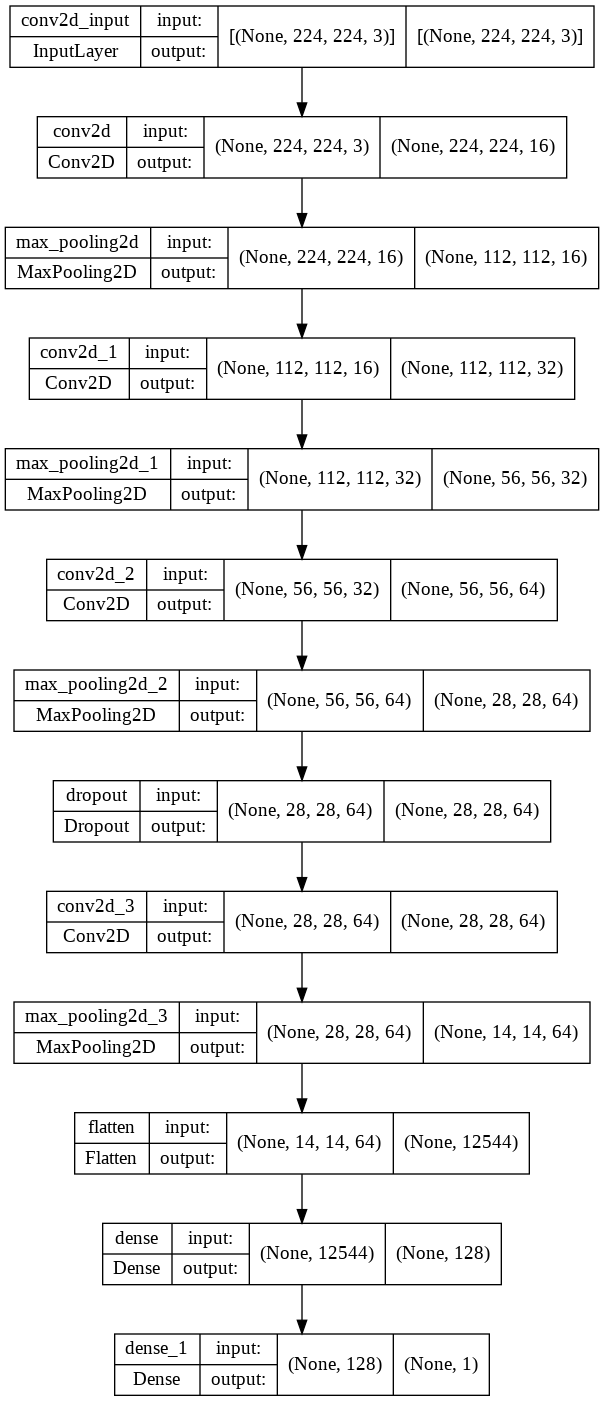

In [30]:
keras.utils.plot_model(model_1, show_shapes=True)

In [18]:
# This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/1/model_1_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_1 = model_1.fit(X_train_1, y_train_1, 
                        epochs=epochs, 
                        validation_data=(X_test_1, y_test_1), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

Epoch 1/100
88/88 [==============================] - 19s 59ms/step - loss: 0.6619 - accuracy: 0.5991 - val_loss: 0.5988 - val_accuracy: 0.6750
Epoch 2/100
88/88 [==============================] - 4s 45ms/step - loss: 0.5463 - accuracy: 0.7213 - val_loss: 0.5147 - val_accuracy: 0.7507
Epoch 3/100
88/88 [==============================] - 4s 45ms/step - loss: 0.4751 - accuracy: 0.7730 - val_loss: 0.4586 - val_accuracy: 0.7821
Epoch 4/100
88/88 [==============================] - 4s 45ms/step - loss: 0.4162 - accuracy: 0.8073 - val_loss: 0.4090 - val_accuracy: 0.8129
Epoch 5/100
88/88 [==============================] - 4s 45ms/step - loss: 0.3729 - accuracy: 0.8390 - val_loss: 0.3768 - val_accuracy: 0.8307
Epoch 6/100
88/88 [==============================] - 4s 46ms/step - loss: 0.3521 - accuracy: 0.8439 - val_loss: 0.3595 - val_accuracy: 0.8421
Epoch 7/100
88/88 [==============================] - 4s 45ms/step - loss: 0.3262 - accuracy: 0.8617 - val_loss: 0.3548 - val_accuracy: 0.8393
Epoch

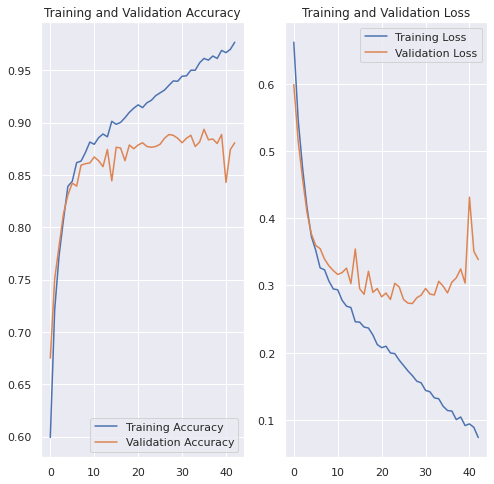

In [19]:
plot_training(history_1)

## 2 - Crossing

In [21]:
class_names_2 = ['crossing', 'other_c']

In [22]:
X_2 = np.load('/content/drive/MyDrive/DISSERTATION/2/X_full_final.npy')

y_2 = []

with open('/content/drive/MyDrive/DISSERTATION/2/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_2.append(row[0])

X_2.shape

(6494, 224, 224, 3)

In [23]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, 
                                                            random_state=42, 
                                                            test_size=0.2, 
                                                            stratify = y_2)

y_train_2 = pd.get_dummies(y_train_2).crossing
y_test_2 = pd.get_dummies(y_test_2).crossing

In [24]:
model_2 = build_model()

In [26]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [27]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/2/model_2_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_2 = model_2.fit(X_train_2, y_train_2, 
                        epochs=epochs, 
                        validation_data=(X_test_2, y_test_2), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

Epoch 1/100
82/82 [==============================] - 7s 59ms/step - loss: 0.6443 - accuracy: 0.6189 - val_loss: 0.5814 - val_accuracy: 0.6890
Epoch 2/100
82/82 [==============================] - 4s 47ms/step - loss: 0.5685 - accuracy: 0.7030 - val_loss: 0.5467 - val_accuracy: 0.7306
Epoch 3/100
82/82 [==============================] - 4s 47ms/step - loss: 0.5159 - accuracy: 0.7382 - val_loss: 0.4939 - val_accuracy: 0.7683
Epoch 4/100
82/82 [==============================] - 4s 45ms/step - loss: 0.4764 - accuracy: 0.7721 - val_loss: 0.4811 - val_accuracy: 0.7883
Epoch 5/100
82/82 [==============================] - 4s 45ms/step - loss: 0.4487 - accuracy: 0.7904 - val_loss: 0.4510 - val_accuracy: 0.7929
Epoch 6/100
82/82 [==============================] - 4s 44ms/step - loss: 0.4177 - accuracy: 0.8085 - val_loss: 0.4431 - val_accuracy: 0.8060
Epoch 7/100
82/82 [==============================] - 3s 41ms/step - loss: 0.3878 - accuracy: 0.8241 - val_loss: 0.4669 - val_accuracy: 0.7914
Epoch 

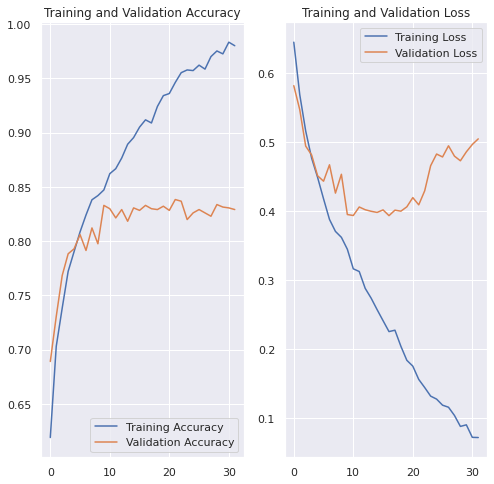

In [28]:
plot_training(history_2)

## 3 - Lane

In [14]:
class_names_3 = ['lane', 'other_l']

In [15]:
X_3 = np.load('/content/drive/MyDrive/DISSERTATION/3/X_full_final.npy')

y_3 = []
with open('/content/drive/MyDrive/DISSERTATION/3/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_3.append(row[0])

X_3.shape

(6998, 224, 224, 3)

In [16]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, 
                                                            random_state=42, 
                                                            test_size=0.2, 
                                                            stratify = y_3)

y_train_3 = pd.get_dummies(y_train_3).cycle_lane
y_test_3 = pd.get_dummies(y_test_3).cycle_lane

In [17]:
model_3 = build_model()

In [18]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [1]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/3/model_3_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_3 = model_3.fit(X_train_3, y_train_3, 
                        epochs=epochs, 
                        validation_data=(X_test_3, y_test_3), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

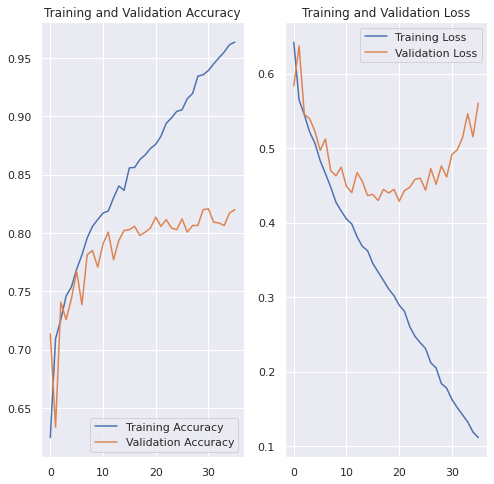

In [20]:
plot_training(history_3)

## 4 - Parking

In [12]:
class_names_4 = ['parking', 'other_p']

In [13]:
X_4 = np.load('/content/drive/MyDrive/DISSERTATION/4/X_full_final.npy')

y_4 = []
with open('/content/drive/MyDrive/DISSERTATION/4/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_4.append(row[0])

X_4.shape

(6998, 224, 224, 3)

In [14]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=42, test_size=0.2, stratify = y_4)

y_train_4 = pd.get_dummies(y_train_4).parking
y_test_4 = pd.get_dummies(y_test_4).parking

In [15]:
model_4 = build_model()

In [16]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [2]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/4/model_4_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_4 = model_4.fit(X_train_4, y_train_4, 
                        epochs=epochs, 
                        validation_data=(X_test_4, y_test_4), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

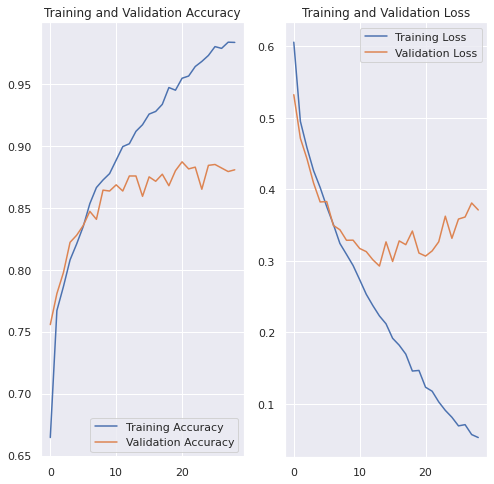

In [18]:
plot_training(history_4)

## 5 - Restricted route

In [20]:
class_names_5 = ['restricted_route', 'other_r']

In [21]:
X_5 = np.load('/content/drive/MyDrive/DISSERTATION/5/X_full_final_e.npy')

y_5 = []
with open('/content/drive/MyDrive/DISSERTATION/5/y_full_final_e.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_5.append(row[0])

X_5.shape

(5100, 224, 224, 3)

In [22]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=42, test_size=0.2, stratify = y_5)

y_train_5 = pd.get_dummies(y_train_5).restricted_route
y_test_5 = pd.get_dummies(y_test_5).restricted_route

In [23]:
y_train_5 = np.asarray(y_train_5).astype('float32').reshape((-1,1))
y_test_5 = np.asarray(y_test_5).astype('float32').reshape((-1,1))

In [24]:
model_5 = build_model()

In [26]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [3]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/5/model_5_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_5 = model_5.fit(X_train_5, y_train_5, 
                        epochs=epochs, 
                        validation_data=(X_test_5, y_test_5), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

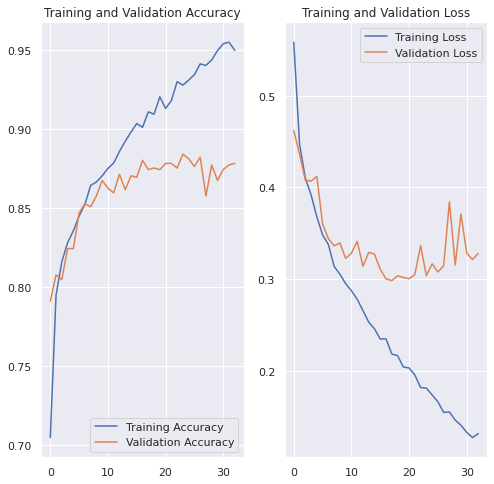

In [28]:
plot_training(history_5)

## 6 - Signal

In [30]:
class_names_6 = ['signal', 'other_s']

In [31]:
X_6 = np.load('/content/drive/MyDrive/DISSERTATION/6/X_full_final.npy')

y_6 = []
with open('/content/drive/MyDrive/DISSERTATION/6/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_6.append(row[0])

X_6.shape

(1619, 224, 224, 3)

In [32]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, random_state=42, test_size=0.2, stratify = y_6)

y_train_6 = pd.get_dummies(y_train_6).signal
y_test_6 = pd.get_dummies(y_test_6).signal

In [33]:
model_6 = build_model()

In [34]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [4]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/6/model_6_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_6 = model_6.fit(X_train_6, y_train_6, 
                        epochs=epochs, 
                        validation_data=(X_test_6, y_test_6), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

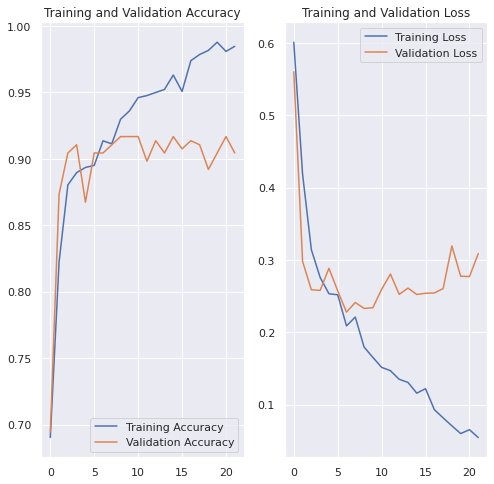

In [36]:
plot_training(history_6)

## 7 - Traffic calming

In [12]:
class_names_7 = ['traffic_calming', 'other_t']

In [13]:
X_7 = np.load('/content/drive/MyDrive/DISSERTATION/7/X_full_final.npy')

y_7 = []
with open('/content/drive/MyDrive/DISSERTATION/7/y_full_final.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        y_7.append(row[0])

X_7.shape

(6998, 224, 224, 3)

In [14]:
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, random_state=42, test_size=0.2, stratify = y_7)

y_train_7 = pd.get_dummies(y_train_7).traffic_calming
y_test_7 = pd.get_dummies(y_test_7).traffic_calming

In [15]:
model_7 = build_model()

In [16]:
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])

In [5]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DISSERTATION/7/model_7_weights.hdf5', 
                                                monitor='val_loss', save_best_only=True)

history_7 = model_7.fit(X_train_7, y_train_7, 
                        epochs=epochs, 
                        validation_data=(X_test_7, y_test_7), 
                        callbacks=[early_stop_callback, checkpoint],
                        batch_size=batch_size)

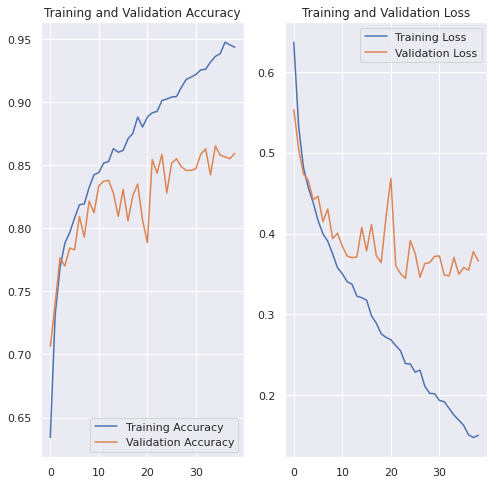

In [18]:
plot_training(history_7)

In [19]:
model_7.save('/content/drive/MyDrive/DISSERTATION/7/model_7_full.h5')